<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/correlation/folder/Corr_Nifty_vs_MMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import datetime

In [19]:
nifty = pd.read_csv('/content/MMI_2021-09-09.csv')
#nifty = pd.read_csv('/content/a.csv')
colnames= ['Date','MMI','Nifty']
nifty.columns=colnames

In [20]:
data = pd.DataFrame({'Date':['09/09/2021'] ,'MMI': [67.89],'Nifty':[17369]})

In [21]:
nifty= pd.concat([data,nifty],axis=0)
nifty.head()

,Date,MMI,Nifty
0,09/09/2021,67.890000,17369.0
0,08/09/2021,66.619092,17353.5
1,07/09/2021,70.404387,17362.1
2,06/09/2021,71.021354,17377.8
3,03/09/2021,72.223849,17323.6


In [22]:
nifty.head(2)

,Date,MMI,Nifty
0,09/09/2021,67.890000,17369.0
0,08/09/2021,66.619092,17353.5


In [23]:
nifty.reset_index(inplace=True)

In [24]:
nifty.head(2)

,index,Date,MMI,Nifty
0,0,09/09/2021,67.890000,17369.0
1,0,08/09/2021,66.619092,17353.5


In [25]:
nifty=nifty[::-1]

In [26]:
nifty['Date']=pd.to_datetime(nifty['Date'],format='%d/%m/%Y')

In [27]:
nifty= nifty.set_index('Date')

In [28]:
nifty = nifty.loc[~nifty.index.duplicated(keep='first')]

In [29]:
data_subset = nifty[['MMI','Nifty']]

In [30]:
data_subset.tail(2)

,MMI,Nifty
Date,,
2021-09-08,66.619092,17353.5
2021-09-09,67.890000,17369.0


In [31]:
data_subset.columns=['close','close1']

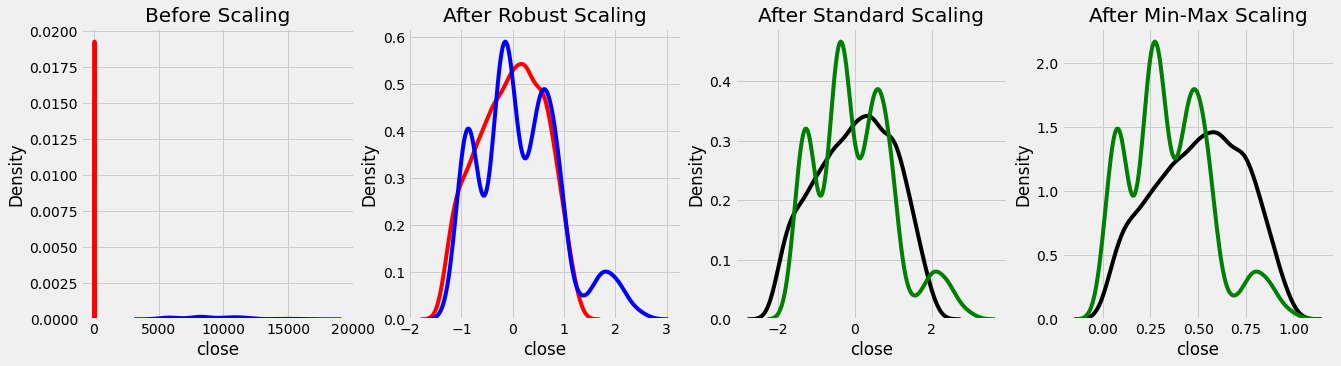

In [32]:
# Importing libraries
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
% matplotlib inline
matplotlib.style.use('fivethirtyeight')

# data
x = data_subset
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['close','close1'])

scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['close','close1'])

scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['close','close1'])

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')

sns.kdeplot(x['close'], ax = ax1, color ='r')
sns.kdeplot(x['close1'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')

sns.kdeplot(robust_df['close'], ax = ax2, color ='red')
sns.kdeplot(robust_df['close1'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')

sns.kdeplot(standard_df['close'], ax = ax3, color ='black')
sns.kdeplot(standard_df['close1'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')

sns.kdeplot(minmax_df['close'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['close1'], ax = ax4, color ='g')
plt.show()

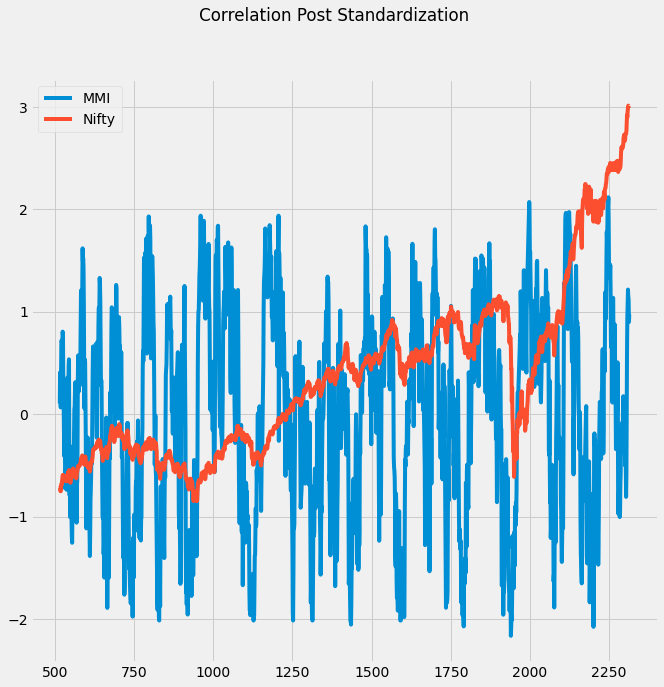

In [33]:
columns=['MMI','Nifty']
standard_df.columns=columns
standard_df[-1800:].plot(figsize=(10,10))
plt.suptitle('Correlation Post Standardization')
plt.show()

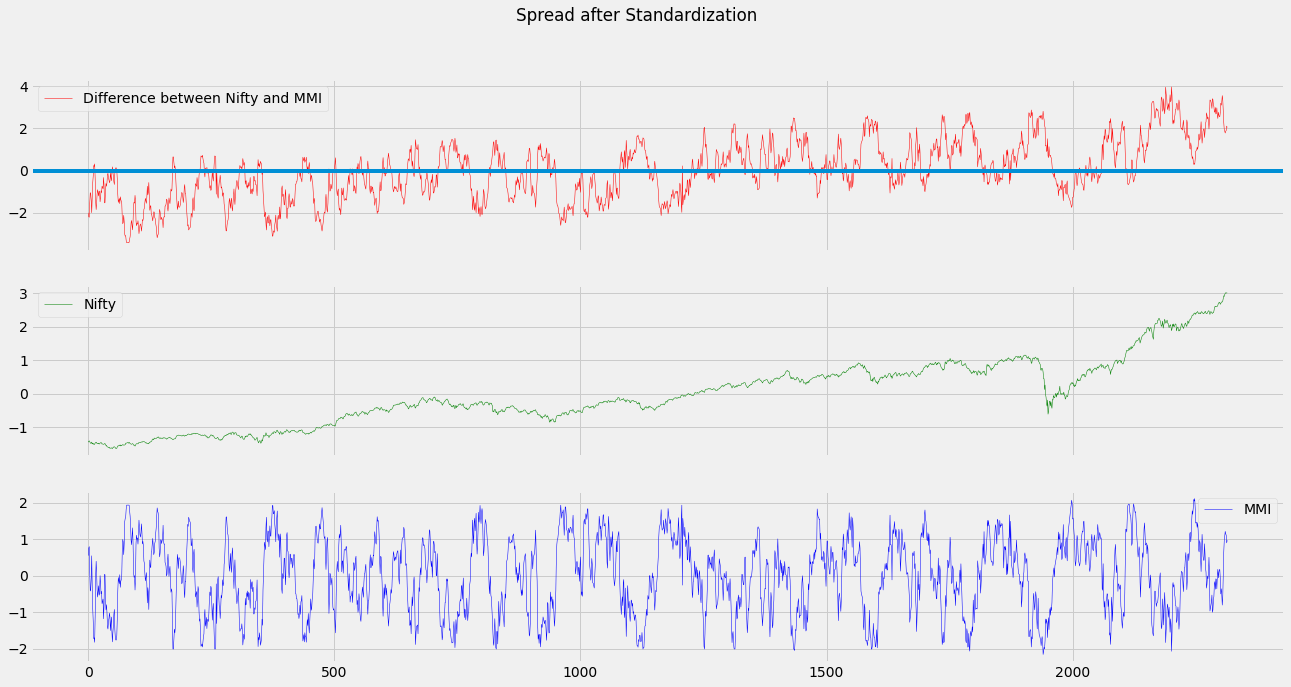

In [34]:
standard_df['diff']=standard_df['Nifty']-standard_df['MMI']
standard_df['diff']=standard_df['diff'].fillna(method='ffill')
plt.rcParams["figure.figsize"] = (20,10)
fig,ax=plt.subplots(3,1,sharex=True)
ax[0].plot(standard_df['diff'],linewidth=0.5,color='r',label='Difference between Nifty and MMI')
ax[1].plot(standard_df['Nifty'],linewidth=0.5,color='g',label='Nifty')
ax[2].plot(standard_df['MMI'],linewidth=0.5,color='b',label='MMI')
ax[0].axhline(y=0)
ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.suptitle('Spread after Standardization')
plt.show()